In [53]:
#Load main libraries
import numpy as np
import pandas as pd
%matplotlib inLine
import matplotlib.pyplot as plt
import seaborn as sns

# Save models
import pickle

# Train-test split
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import VotingRegressor

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Hyperparameter
from sklearn.model_selection import GridSearchCV

In [6]:
                  ############## DATA SCALING AND TRAIN TEST SPLITTING ###############

In [7]:
# Load pre-processed data
data = pd.read_csv('data/pre-processed/preprocessed_dataframe.csv')


In [8]:
# Split in test and train data

In [9]:
X = data.drop(["Enedc (g/km)"],axis=1)
y = data["Enedc (g/km)"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=0)
print('X Train: {}'.format(X_train.shape)) 
print('Y Train: {}'.format(y_train.shape)) 
print('X Test: {}'.format(X_test.shape)) 
print('Y Test: {}'.format(y_test.shape))

X Train: (14700, 24)
Y Train: (14700,)
X Test: (4900, 24)
Y Test: (4900,)


In [11]:
# Scaling input variables
to_scale = ['Mk','m (kg)','W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)']

for feature in to_scale:
    minmax = MinMaxScaler()
    X_train[feature] = minmax.fit_transform(X_train[feature].to_numpy().reshape(-1,1))
    X_test[feature] = minmax.fit_transform(X_test[feature].to_numpy().reshape(-1,1))

In [12]:
X_test.head()

,Mk,m (kg),W (mm),At1 (mm),ec (cm3),ep (KW),Mp_BMW GROUP,Mp_DAIMLER AG,Mp_GENERAL MOTORS,Mp_KIA,...,Fm_B,Fm_E,Fm_M,Ft_Diesel,Ft_Diesel/Electric,Ft_Electric,Ft_LPG,Ft_NG-biomethane,Ft_Petrol,Ft_Petrol/Electric
15714,0.363721,0.086168,0.275578,0.402277,0.142809,0.113445,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5814,0.436753,0.253968,0.326147,0.523719,0.136922,0.102941,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
8581,0.436753,0.424036,0.420227,0.599620,0.393608,0.334034,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
3974,0.349591,0.187302,0.288906,0.436433,0.092851,0.105042,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2436,0.366748,0.326531,0.376715,0.554080,0.224895,0.323529,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
# Saving X-test da
X_test.to_csv('data_test.csv',index = False)

In [14]:
X_train.head()

,Mk,m (kg),W (mm),At1 (mm),ec (cm3),ep (KW),Mp_BMW GROUP,Mp_DAIMLER AG,Mp_GENERAL MOTORS,Mp_KIA,...,Fm_B,Fm_E,Fm_M,Ft_Diesel,Ft_Diesel/Electric,Ft_Electric,Ft_LPG,Ft_NG-biomethane,Ft_Petrol,Ft_Petrol/Electric
17702,0.357341,0.220141,0.286313,0.504744,0.216486,0.073694,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5465,0.388669,0.222014,0.287076,0.462998,0.155851,0.046642,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
15970,0.425299,0.257611,0.306138,0.527514,0.139626,0.041045,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
12221,0.436753,0.505855,0.383912,0.593928,0.788922,0.372201,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1169,0.392814,0.374239,0.340450,0.557875,0.155851,0.108209,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
# Saving X_train data
X_train.to_csv('data_train.csv',index = False)

In [12]:
# Saving y-test data
y_test.to_csv('target_test.csv',index = False)

In [13]:
# Saving y-train data
y_train.to_csv('target_train.csv',index = False)

In [18]:
# Calculating the baseline for model evaluation 
MSE = mean_squared_error([np.mean(y_train)]*len(y_test), y_test)
MSE

1583.5860919940767

In [57]:
########## LINEAR REGRESSION ##########

In [58]:
LineareRegression = LinearRegression()  
LineareRegression.fit(X_train, y_train)

LinearRegression()

In [59]:
# Saving the model
Model_linear_regression = LineareRegression.fit(X_train, y_train) 
pickle.dump(Model_linear_regression, open('Model_linear_regression.pkl', 'wb'))

In [60]:
########## POLINOMIAL REGRESSION ##########

In [61]:
polyModel = PolynomialFeatures(degree = 2)
xpol_train = polyModel.fit_transform(X_train)
xpol_test = polyModel.fit_transform(X_test)
preg = polyModel.fit(xpol_train,y_train)

In [62]:
xpol_train.shape

(14700, 325)

In [63]:
xpol_test.shape

(4900, 325)

In [64]:
liniearModel = LinearRegression()
liniearModel.fit(xpol_train, y_train)

LinearRegression()

In [65]:
# Saving the model
Model_polynomial_regression = liniearModel.fit(xpol_train, y_train)
pickle.dump(Model_polynomial_regression, open('Model_polynomial_regression.pkl', 'wb'))

In [66]:
########## GRADIENT DESCENT ##########

In [67]:
sgdr = SGDRegressor(penalty=None,random_state=0)
sgdr.fit(X_train, y_train)

SGDRegressor(penalty=None, random_state=0)

In [68]:
# Saving the model
Model_gradient_descent = sgdr.fit(X_train, y_train)
pickle.dump(Model_gradient_descent, open('Model_gradient_descent.pkl', 'wb'))

In [69]:
########## KNN REGRESSOR ##########

In [70]:
knn_model = KNeighborsRegressor()

In [71]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [72]:
# Saving the model
Model_knn = knn_model.fit(X_train, y_train)
pickle.dump(Model_knn, open('Model_knn.pkl', 'wb'))

In [73]:
########## DECISION TREE REGRESSOR ##########

In [74]:
Tree = DecisionTreeRegressor(max_depth=None, random_state = 0) 
Tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [75]:
# Saving the model
Model_tree = Tree.fit(X_train, y_train)
pickle.dump(Model_tree, open('Model_tree.pkl', 'wb'))

In [76]:

fig, ax = plt.subplots(figsize=(13, 6))

print(f"Baumtiefe: {Tree.get_depth()}")
print(f"Knotennummer: {Tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = Tree,
            feature_names = X.columns, 
            class_names   = 'target',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

Baumtiefe: 26
Knotennummer: 3234
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fea7a52b670> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fea7a10c8b0> (for post_execute):


KeyboardInterrupt: 

In [77]:
########## RANDOM FOREST REGRESSOR ##########

In [78]:
rf = RandomForestRegressor(random_state =0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [79]:
# Saving the model
Model_forest = rf.fit(X_train, y_train)
pickle.dump(Model_forest, open('Model_forest.pkl', 'wb'))

In [80]:
##########  SVM REGRESSOR  #############

In [81]:
vector = svm.SVR()

vector.fit(X_train, y_train)

SVR()

In [82]:
# Saving the model
Model_svm = vector.fit(X_train, y_train)
pickle.dump(Model_svm, open('Model_svm.pkl', 'wb'))

In [83]:
##########  VOTING REGRESSOR  #############

In [84]:
reg1 = LinearRegression()
reg2 = SGDRegressor(penalty=None, random_state=0)
reg3 = KNeighborsRegressor()
reg4 = DecisionTreeRegressor(random_state=0)
reg5 = RandomForestRegressor(random_state=0)
reg6 = svm.SVR()

ereg = VotingRegressor([("lr", reg1), ("gd", reg2), ("knn", reg3), ("dt", reg4), ("rf", reg5),("svm", reg6)])
ereg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('gd', SGDRegressor(penalty=None, random_state=0)),
                            ('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor(random_state=0)),
                            ('rf', RandomForestRegressor(random_state=0)),
                            ('svm', SVR())])

In [85]:
# Saving the model
Model_voting = ereg.fit(X_train, y_train)
pickle.dump(Model_voting, open('Model_voting.pkl', 'wb'))

In [ ]:
############# METRICS ##############

In [15]:
# Generating Voting again
reg1 = LinearRegression()
reg2 = SGDRegressor(penalty=None, random_state=0)
reg3 = KNeighborsRegressor()
reg4 = DecisionTreeRegressor(random_state=0)
reg5 = RandomForestRegressor(random_state=0)
reg6 = svm.SVR()

ereg = VotingRegressor([("lr", reg1), ("gd", reg2), ("knn", reg3), ("dt", reg4), ("rf", reg5),("svm", reg6)])
ereg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('gd', SGDRegressor(penalty=None, random_state=0)),
                            ('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor(random_state=0)),
                            ('rf', RandomForestRegressor(random_state=0)),
                            ('svm', SVR())])

In [16]:
import time

import warnings
warnings.filterwarnings('ignore')

def mse(y_pred,y):
    return np.mean((y_pred-y)**2)

def train_evaluate_time(method):
    start_time = time.time()
    methods[method].fit(X_train, y_train)
    running_time = round(time.time() - start_time,2)
    model_predict = methods[method].predict(X_test)
    model_mse = mse(model_predict,y_test)
    print("Mean Absolute Error of {}: {}; running time: {}".format(method, model_mse, running_time))


methods = {"Linear Regression": LinearRegression(),"Gradient Descent": SGDRegressor(penalty=None, random_state=0),"K-Nearest Neighbors": KNeighborsRegressor(), "Decision Tree": DecisionTreeRegressor(random_state=0), 
           "Random Forest": RandomForestRegressor(random_state=0),"svm": svm.SVR(), "Voting Regressor": VotingRegressor([("lr", reg1), ("gd", reg2), ("knn", reg3), ("dt", reg4), ("rf", reg5),("svm", reg6)])}


for method in methods:
    train_evaluate_time(method)

Mean Absolute Error of Linear Regression: 314.30776248854033; running time: 0.06
Mean Absolute Error of Gradient Descent: 356.8036390961336; running time: 0.15
Mean Absolute Error of K-Nearest Neighbors: 360.5519918367364; running time: 0.0
Mean Absolute Error of Decision Tree: 874.7768647977471; running time: 0.03
Mean Absolute Error of Random Forest: 597.9102988749611; running time: 2.04
Mean Absolute Error of svm: 400.9518950575316; running time: 9.19
Mean Absolute Error of Voting Regressor: 318.68556702853715; running time: 11.41


In [1]:
#################### HYPERPARAMETERS#############

In [2]:
#######Gradient descent#####

In [21]:
import warnings
warnings.filterwarnings('ignore')

SGD_model_grid = SGDRegressor()  
params = {"alpha": [0.0001,0.001, 0.01, 0.1, 0.5], "learning_rate":['constant', 'optimal', 'invscaling', 'adaptive'], "penalty":[None], 'random_state': [0]}
gs_SGD = GridSearchCV(SGD_model_grid,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=10)
gs_SGD.fit(X_train, y_train)
print (gs_SGD.score(X_train, y_train))
print("Residual sum of squares: %.2f"
              % np.mean((gs_SGD.predict(X_test) - y_test) ** 2))
print(gs_SGD.best_params_)

-321.6310273544827
Residual sum of squares: 322.16
{'alpha': 0.0001, 'learning_rate': 'adaptive', 'penalty': None, 'random_state': 0}


In [22]:
######## KNN regressor #########

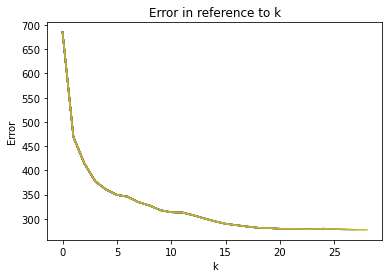

In [23]:
# Plotting the error for a k range
def mse(y_pred,y):
    return np.mean((y_pred-y)**2)


error = []
for i in range(1, 30):
    
    
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    train_preds = knn_model.predict(X_train)
    y_pred_KNN = knn_model.predict(X_test)
    error.append(mse(y_pred_KNN, y_test))
    
    
    plt.title("Error in reference to k")
    plt.plot(error)
    plt.xlabel("k")
    plt.ylabel("Error")
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
knn_model_grid = KNeighborsRegressor()
params = {'n_neighbors' : range(1, 50),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs_knn = GridSearchCV(knn_model_grid,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=10)
gs_knn.fit(X_train, y_train)
print (gs_knn.score(X_train, y_train))
print("Residual sum of squares: %.2f"
              % np.mean((gs_knn.predict(X_test) - y_test) ** 2))
print(gs_knn.best_params_)

-11.859683673469386
Residual sum of squares: 214.81
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [25]:
######## Decision Tree regressor ########

In [31]:
# Trying several max depth of the tree
max_depth= range(1,20)

for i in max_depth:
    
    Treeloops = DecisionTreeRegressor(max_depth=i, random_state = 0)

    Treeloops.fit(X_train, y_train)

    y_pred_DT_loops = Treeloops.predict(X_test)

    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_DT_loops))  

Mean Squared Error: 1173.397068423983
Mean Squared Error: 868.4415620700037
Mean Squared Error: 823.7562975262631
Mean Squared Error: 649.6754525178192
Mean Squared Error: 531.9871083704298
Mean Squared Error: 592.2581319136616
Mean Squared Error: 663.1484993930917
Mean Squared Error: 630.0027285275679
Mean Squared Error: 637.7314969318776
Mean Squared Error: 764.0219244823527
Mean Squared Error: 771.2033457683095
Mean Squared Error: 786.0954433957311
Mean Squared Error: 812.9241606779474
Mean Squared Error: 762.0882959408731
Mean Squared Error: 807.1494804286056
Mean Squared Error: 840.0852352287139
Mean Squared Error: 729.8435242912657
Mean Squared Error: 819.5079648801983
Mean Squared Error: 847.974466375097


In [32]:
from sklearn.model_selection import GridSearchCV
DT_model_grid = DecisionTreeRegressor()  
params = {"max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], 
          "min_samples_split":[1,2,3,4,5,6,7,8,9,10], "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],"random_state":[0]}
gs_DT = GridSearchCV(DT_model_grid,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=10)
gs_DT.fit(X_train, y_train)
print (gs_DT.score(X_train, y_train))
print("Residual sum of squares: %.2f"
              % np.mean((gs_DT.predict(X_test) - y_test) ** 2))
print(gs_DT.best_params_)

-18.872736184732425
Residual sum of squares: 807.43
{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 0}


In [33]:
######## Random Forest Regressor #########

In [34]:
# Trying several number of estimators
n_estimators = (100, 200, 300, 400, 500, 1000, 1500, 2000, 2500)

for n in n_estimators:
    
    Forestloops = RandomForestRegressor(n_estimators=n, random_state = 0)

    Forestloops.fit(X_train, y_train)

    y_pred_RF_loops = Forestloops.predict(X_test)

    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF_loops))  
    print('R2 Score:', metrics.r2_score(y_test, y_pred_RF_loops))

Mean Squared Error: 597.9102988749598
R2 Score: 0.6223331118563973
Mean Squared Error: 594.0947716132522
R2 Score: 0.6247431695360653
Mean Squared Error: 600.8627212695574
R2 Score: 0.6204682298158115
Mean Squared Error: 608.5738864142334
R2 Score: 0.6155975130048937
Mean Squared Error: 605.6197466964178
R2 Score: 0.6174634797836365
Mean Squared Error: 598.5867238238502
R2 Score: 0.6219058516034951
Mean Squared Error: 596.7209036171053
R2 Score: 0.6230843871006135
Mean Squared Error: 599.0670052966437
R2 Score: 0.6216024843432151
Mean Squared Error: 596.6388436666209
R2 Score: 0.6231362198357228


In [37]:
from sklearn.model_selection import GridSearchCV
RF_model_grid = RandomForestRegressor()  
params = {"n_estimators":[100, 200, 300, 400],
          "max_depth" : [1,2,3,4,5,6,7,8,9,10],"random_state":[0]}
gs_RF = GridSearchCV(RF_model_grid,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=10)
gs_RF.fit(X_train, y_train)
print (gs_RF.score(X_train, y_train))
print("Residual sum of squares: %.2f"
              % np.mean((gs_RF.predict(X_test) - y_test) ** 2))
print(gs_RF.best_params_)

-80.80062705032167
Residual sum of squares: 579.47
{'max_depth': 10, 'n_estimators': 400, 'random_state': 0}


In [38]:
################## svm regressor ################

In [39]:
# Trying several C´s

C = (0.0001, 0.001, 0.1, 1, 10, 100, 1000)

for c in C:
    
    vectorloop = svm.SVR(C=c)

    vectorloop.fit(X_train, y_train)
    
    y_pred_SVM_loops = vectorloop.predict(X_test) 
    
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SVM_loops))  

Mean Squared Error: 1605.8282175144811
Mean Squared Error: 1591.9173058477093
Mean Squared Error: 945.0342547959914
Mean Squared Error: 400.9518950575309
Mean Squared Error: 282.42461110062686
Mean Squared Error: 354.6840113794755
Mean Squared Error: 609.8479058871114


In [41]:
from sklearn.model_selection import GridSearchCV
SVM_model_grid = svm.SVR()  
params = {'C':[0.0001, 0.001, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
gs_SVM = GridSearchCV(SVM_model_grid,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=10)
gs_SVM.fit(X_train, y_train)
print (gs_SVM.score(X_train, y_train))
print("Residual sum of squares: %.2f"
              % np.mean((gs_SVM.predict(X_test) - y_test) ** 2))
print(gs_SVM.best_params_)

-231.48911157733332
Residual sum of squares: 354.68
{'C': 100, 'gamma': 'scale'}


In [ ]:
######### Voting Regressor #######

In [45]:
reg1_hyp = LinearRegression()
reg2_hyp = SGDRegressor(alpha=0.001, learning_rate= 'adaptive', penalty=None, random_state=0)
reg3_hyp = KNeighborsRegressor(n_neighbors=6, metric= 'manhattan', weights= 'distance')
reg4_hyp = DecisionTreeRegressor(max_depth=5, random_state=0) 
reg5_hyp = RandomForestRegressor(n_estimators=400,max_depth=10, random_state=0)
reg6_hyp = svm.SVR(C=10)

ereg_hyp = VotingRegressor([("lr", reg1_hyp), ("gd", reg2_hyp), ("knn", reg3_hyp), ("dt", reg4_hyp), ("rf", reg5_hyp),("svm", reg6_hyp)])

In [46]:
# Evaluation after hyperparameters

import time

import warnings
warnings.filterwarnings('ignore')

def mse(y_pred,y):
    return np.mean((y_pred-y)**2)

def train_evaluate_time(method):
    start_time = time.time()
    methods[method].fit(X_train, y_train)
    running_time = round(time.time() - start_time,2)
    model_predict = methods[method].predict(X_test)
    model_mse = mse(model_predict,y_test)
    print("Mean Absolute Error of {}: {}; running time: {}".format(method, model_mse, running_time))


methods = {"Linear Regression": LinearRegression(),"Gradient Descent": SGDRegressor(alpha=0.001, learning_rate= 'adaptive', penalty=None, random_state=0),"K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=6, metric= 'manhattan', weights= 'distance'), "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=0), 
           "Random Forest": RandomForestRegressor(n_estimators=400,max_depth=10, random_state=0),"svm": svm.SVR(C=10), "Voting Regressor": VotingRegressor([("lr", reg1_hyp), ("gd", reg2_hyp), ("knn", reg3_hyp), ("dt", reg4_hyp), ("rf", reg5_hyp),("svm", reg6_hyp)])}


for method in methods:
    train_evaluate_time(method)

Mean Absolute Error of Linear Regression: 314.30776248854033; running time: 0.06
Mean Absolute Error of Gradient Descent: 322.16105351925796; running time: 0.06
Mean Absolute Error of K-Nearest Neighbors: 214.80665038854477; running time: 0.0
Mean Absolute Error of Decision Tree: 531.9871083704267; running time: 0.01
Mean Absolute Error of Random Forest: 579.474066537761; running time: 5.71
Mean Absolute Error of svm: 282.42461110062703; running time: 9.5
Mean Absolute Error of Voting Regressor: 259.55448226330896; running time: 15.26


In [ ]:
# FINAL EVALUATION MSE and RUNNING TIME

In [56]:
MSE_before = (314.30776248854033, 356.8036390961336, 360.5519918367364, 874.7768647977471, 597.9102988749611, 400.9518950575316, 318.68556702853715)
MSE_after = (314.30776248854033 , 322.16105351925796, 214.80665038854477, 531.9871083704267, 579.474066537761, 282.42461110062703, 259.55448226330896)

In [57]:
col={'MSE no tuning':MSE_before,'MSE with tuning':MSE_after}
models=['Linear Regression','Gradient Descent','K-Nearest Neighbors','Decision Tree','Random Forest', 'svm', 'Voting Regressor']
df=pd.DataFrame(data=col,index=models)
df

,MSE no tuning,MSE with tuning
Linear Regression,314.307762,314.307762
Gradient Descent,356.803639,322.161054
K-Nearest Neighbors,360.551992,214.806650
Decision Tree,874.776865,531.987108
Random Forest,597.910299,579.474067
svm,400.951895,282.424611
Voting Regressor,318.685567,259.554482


<AxesSubplot:>

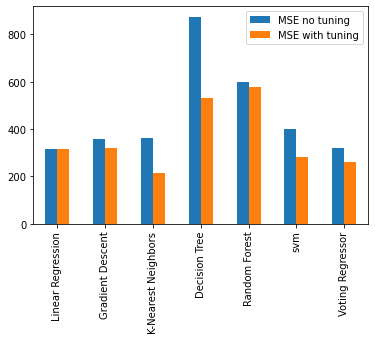

In [58]:
df.plot(kind='bar')

In [64]:
Running_time_before = (0.06, 0.15, 0.0, 0.03, 2.04, 9.19, 11.41)
Running_time_after = (0.06 , 0.06, 0.0, 0.01, 5.71, 9.5, 15.26)

In [65]:
col={'Running time before tuning':Running_time_before,'Running time after tuning':Running_time_after}
models=['Linear Regression','Gradient Descent','K-Nearest Neighbors','Decision Tree','Random Forest', 'svm', 'Voting Regressor']
df=pd.DataFrame(data=col,index=models)
df

,Running time before tuning,Running time after tuning
Linear Regression,0.06,0.06
Gradient Descent,0.15,0.06
K-Nearest Neighbors,0.00,0.00
Decision Tree,0.03,0.01
Random Forest,2.04,5.71
svm,9.19,9.50
Voting Regressor,11.41,15.26


<AxesSubplot:>

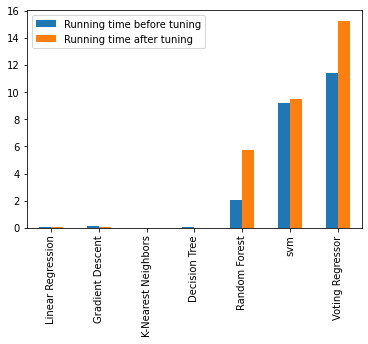

In [66]:
df.plot(kind='bar')